## 2.1　简单线性回归

In [1]:
import sklearn
sklearn.__version__

'1.3.1'

代码2.1

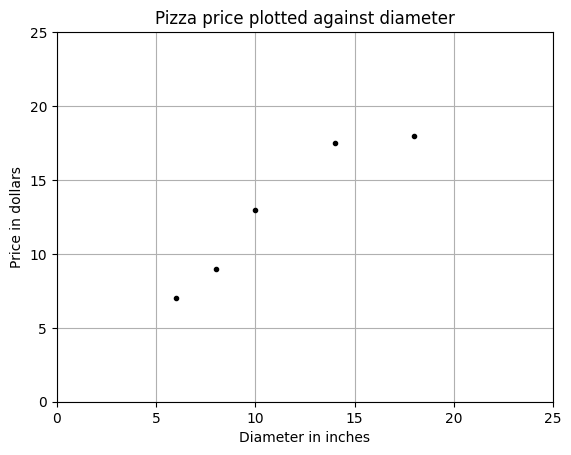

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# "np" 和 "plt" 分别是Numpy库和Matplotlib库的常用别名

# 在scikit-learn中的一个惯用法是将特征向量的矩形命名为X
# 大写字母表示矩阵，小写字母表示向量

X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
# X表示我们的训练数据的特征，即披萨的直径
y = [7, 9, 13, 17.5, 18]
# y是一个表示披萨价格的向量

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

代码2.2

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # 创建一个估计器实例
model.fit(X, y)  # 用训练数据拟合模型

test_pizza = np.array([[12]])
predicted_price = model.predict(test_pizza)[0]
# 预测一个直径之前从未见过的披萨的价格
print('A 12" pizza should cost: $%.2f' % predicted_price)

A 12" pizza should cost: $13.68


### 2.1.1　用代价函数评价模型的拟合性

代码2.3

In [4]:
print('Residual sum of squares: %.2f' % np.mean((model.predict(X)- y) ** 2))

Residual sum of squares: 1.75


### 2.1.2　求解简单线性回归的OLS

代码2.4

In [5]:
import numpy as np

X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
x_bar = X.mean()
print(x_bar)

# 注意我们在计算样本方差的时候将样本的数量减去1
# 这项技巧称为贝塞尔校正，它纠正了对样本中总体方差估计的偏差

variance = ((X - x_bar)**2).sum() / (X.shape[0] - 1)
print(variance)

11.2
23.2


代码2.5

In [6]:
print(np.var(X, ddof=1))

23.2


代码2.6

In [7]:
# 之前我们使用一个列表表示y
# 在这里我们改为使用一个Numpy多位数组，它包含了几个计算样本均值的方法
y = np.array([7, 9, 13, 17.5, 18])

y_bar = y.mean()
# 我们将X转置，因为所有的操作都必须是行向量
covariance = np.multiply((X - x_bar).transpose(), y - y_bar).sum()/(X.shape[0] - 1)
print(covariance)
print(np.cov(X.transpose(), y)[0][1])

22.65
22.650000000000002


## 2.2　评价模型

代码2.7

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = [7, 9, 13, 17.5, 18]

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = [11, 8.5, 15, 18, 11]

model = LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_test, y_test)
print(r_squared )

0.6620052929422553


## 2.3　小结